In [1]:
import torch 
import os 

%cd /workspace/Walk_Video_PyTorch/project

/workspace/Walk_Video_PyTorch/project


In [2]:
from models.pytorchvideo_models import WalkVideoClassificationLightningModule
from dataloader.data_loader import WalkDataModule

from pytorch_lightning import Trainer

from IPython.display import clear_output

clear_output()

In [3]:
from pytorch_lightning import seed_everything

seed_everything(42, workers=True)

Global seed set to 42


42

In [4]:
from parameters import get_parameters

opt, _ = get_parameters()
opt.num_workers = 8
opt.batch_size = 8
opt.gpu_num = 1

opt.version = '1201_1_16'
opt.model = "resnet"
opt.model_depth = 50
opt.model_class_num = 1

opt.clip_duraion = 1
opt.uniform_temporal_subsample_num = 16
opt.version = opt.version + '_' + opt.model + '_depth' + str(opt.model_depth)

opt.fusion_method = 'slow_fusion'
opt.fix_layer = 'all'
opt.train_path = '/workspace/data/split_pad_dataset_512/flod2'

opt.transfor_learning = True
opt.pre_process_flag = True


In [5]:
from utils.utils import get_ckpt_path

from pytorch_lightning import loggers as pl_loggers 

# for the tensorboard
tb_logger = pl_loggers.TensorBoardLogger(save_dir="/workspace/Walk_Video_PyTorch/project/tests/logs", name=opt.model, version=opt.version)

model = WalkVideoClassificationLightningModule(opt)

data_module = WalkDataModule(opt)

# get last ckpt path
# ckpt_path = get_ckpt_path(opt)

ckpt_path = '/workspace/Walk_Video_PyTorch/logs/resnet/1119_1_8_resnet_depth50/flod2/checkpoints/epoch=11-val_loss=0.63-val_acc=0.8926.ckpt'

trainer = Trainer(
    devices=[opt.gpu_num,],
    accelerator="gpu",
    logger=tb_logger,
)

list = trainer.test(model, dataloaders=data_module, ckpt_path=ckpt_path)


Using cache found in /root/.cache/torch/hub/facebookresearch_pytorchvideo_main
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /workspace/Walk_Video_PyTorch/logs/resnet/1119_1_8_resnet_depth50/flod2/checkpoints/epoch=11-val_loss=0.63-val_acc=0.8926.ckpt


##################################################
run pre process model! /workspace/data/split_pad_dataset_512/flod2
##################################################


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from checkpoint at /workspace/Walk_Video_PyTorch/logs/resnet/1119_1_8_resnet_depth50/flod2/checkpoints/epoch=11-val_loss=0.63-val_acc=0.8926.ckpt


Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/data.py:85: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/data.py:85: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.877237856388092     │
│         test_loss         │    0.5881133675575256     │
│      test_precision       │     0.803239643573761     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
list

[{'test_loss': 0.5881133675575256,
  'test_acc': 0.877237856388092,
  'test_precision': 0.803239643573761}]

In [7]:
from dataloader.data_loader import WalkDataModule
from pytorch_lightning import loggers as pl_loggers 

# load test dataset 
module = WalkDataModule(opt)
module.setup()
test_data = module.test_dataloader()

# for the tensorboard
tb_logger = pl_loggers.TensorBoardLogger(save_dir="/workspace/Walk_Video_PyTorch/project/tests/logs", name=opt.model, version=opt.version)


##################################################
run pre process model! /workspace/data/split_pad_dataset_512/flod2
##################################################


In [8]:
import numpy as np 

from captum.attr import (
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
    GuidedGradCam,
)

from matplotlib.colors import LinearSegmentedColormap

import torchvision
from torchvision import models
from torchvision import transforms


from captum.attr import visualization as viz

torch.manual_seed(123)
np.random.seed(123)

In [9]:
for i in test_data:
    print(i)
    break

{'video': tensor([[[[[-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           ...,
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.]],

          [[-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           ...,
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.]],

          [[-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           ...,
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.],
           [-2., -2., -2.,  ..., -2., -2., -2.]],

          ...,

          [[-2., -2., -2.,  ..., -2., 

In [10]:
batch = next(iter(test_data))

video = batch['video'].detach() # b, c, t, h, w
label = batch['label'].detach() # b, class num

video.shape, label.shape

(torch.Size([8, 3, 16, 224, 224]), torch.Size([8]))

In [11]:
# preds the video
with torch.no_grad():
    preds = model(video)

In [12]:
preds, label

(tensor([[ -3.1140],
         [  5.4317],
         [  8.1546],
         [  0.5816],
         [  4.7674],
         [  6.3302],
         [-16.6927],
         [  0.5159]]),
 tensor([1, 1, 1, 1, 1, 1, 0, 1]))

In [13]:
torch.sigmoid(preds)

tensor([[4.2535e-02],
        [9.9564e-01],
        [9.9971e-01],
        [6.4143e-01],
        [9.9157e-01],
        [9.9822e-01],
        [5.6294e-08],
        [6.2618e-01]])

# Integrated Gradients 

In [14]:
# a series frame show 
def series_attr_show(attributions, raw_img, flag):
    '''
    show a series img where combine the raw img with the attr map.

    Args:
        attributions (tensor): attributions map, shape(b, c, f, h, w)
        raw_img (tensor): raw image, shape(b, c, f, h, w)
        flag (str): disease flag, choice [asd, asd_not]
    '''
    
    flag = flag.item()

    # to cpu and numpy
    attributions_ig = attributions.squeeze().cpu().detach().numpy() # c, f, h, w
    raw_img = raw_img.squeeze().cpu().detach().numpy() # c, f, h, w

    attr_ig_transpose = attributions_ig.transpose(1, 0, 2, 3) # f, c, h, w
    raw_img_transpose = raw_img.transpose(1, 0, 2, 3) # f, c, h, w

    f, c, h, w = attr_ig_transpose.shape

    for frame in range(f):

        now_attr_ig = attr_ig_transpose[frame].transpose(1, 2, 0) # h, w, c
        now_raw_img = raw_img_transpose[frame].transpose(1, 2, 0) # h, w, c

        # the attr map and raw img must have shape (h, w, c)
        figure, axis = viz.visualize_image_attr_multiple(now_attr_ig, 
                                now_raw_img,
                                methods=['original_image', 'blended_heat_map'],
                                signs=['all', 'all'],
                                show_colorbar=True,
                                outlier_perc=1, 
                                titles=['%s frame' % frame, 'attributions ig, label %s' % flag])


WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


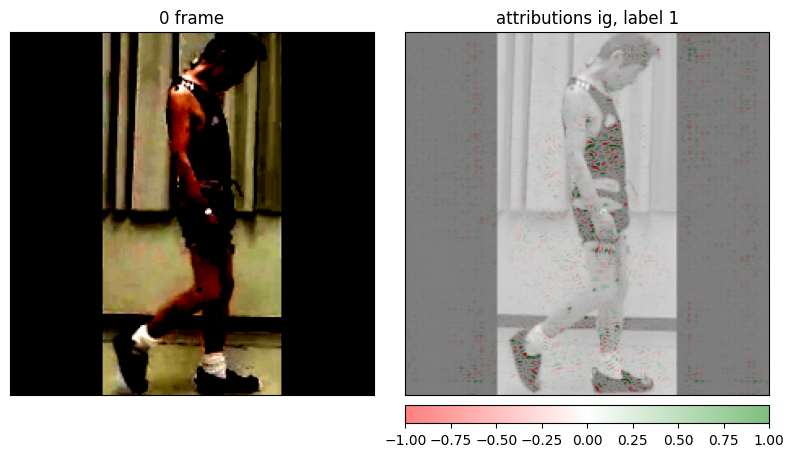

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


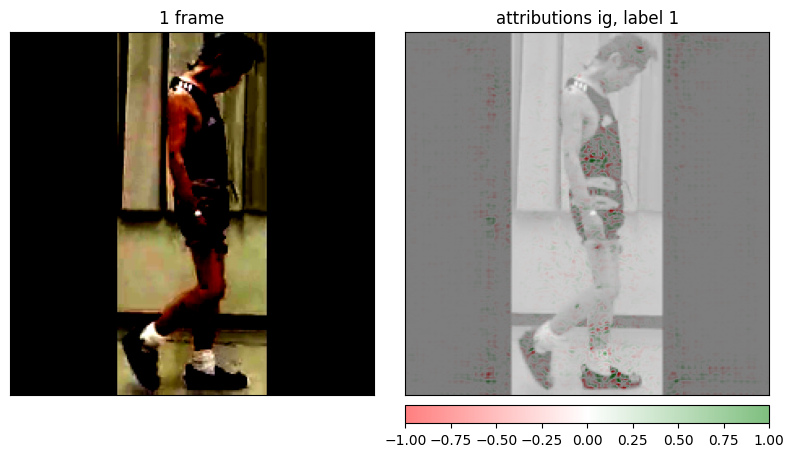

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


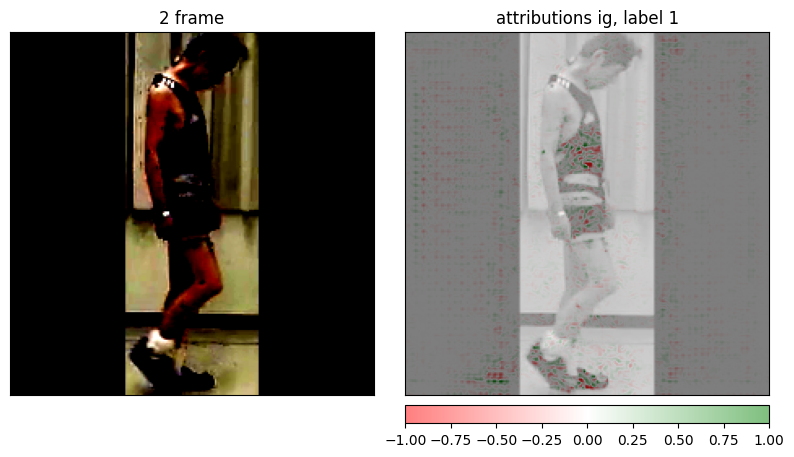

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


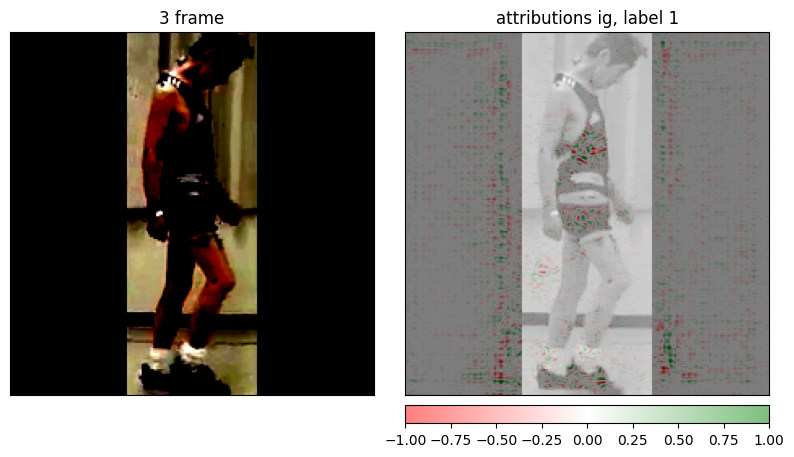

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


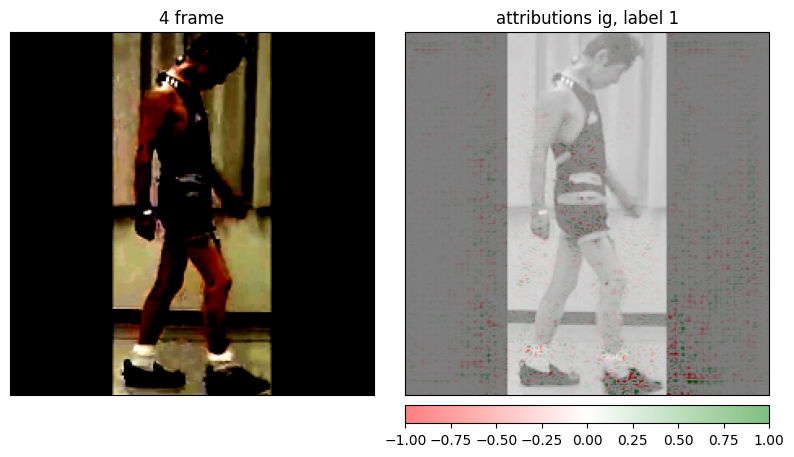

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


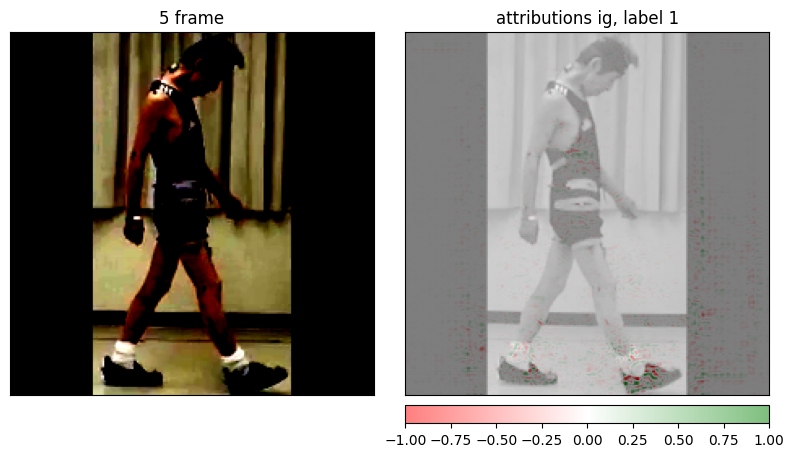

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


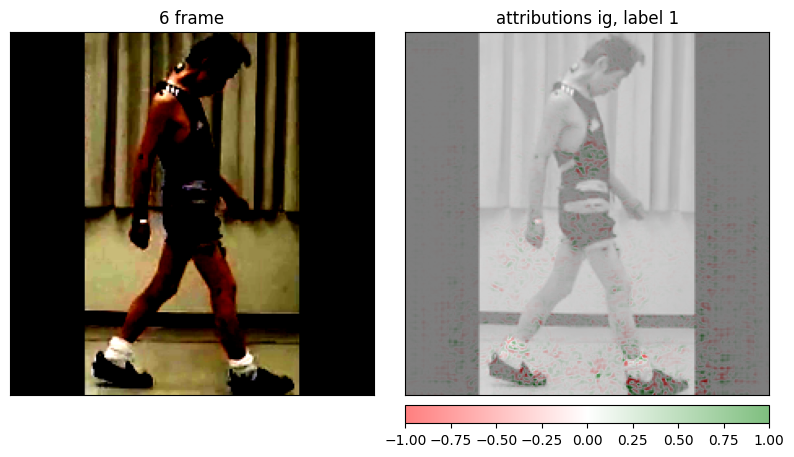

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


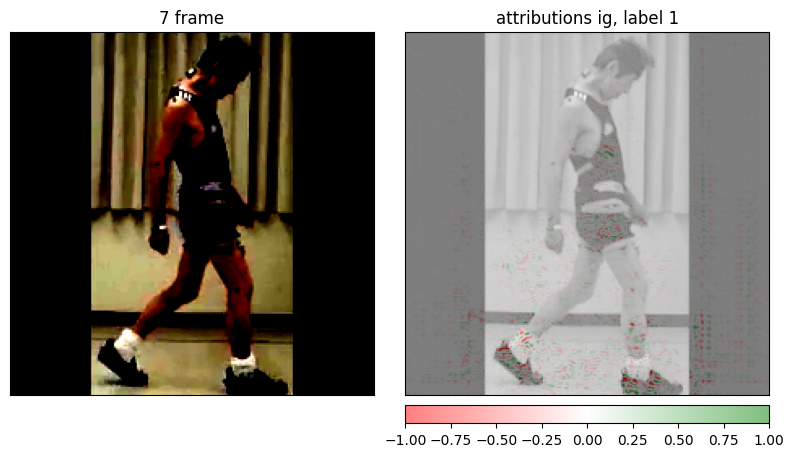

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


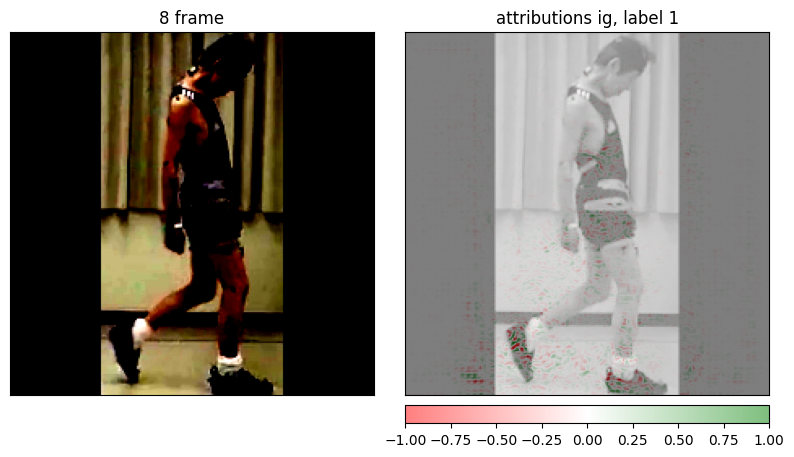

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


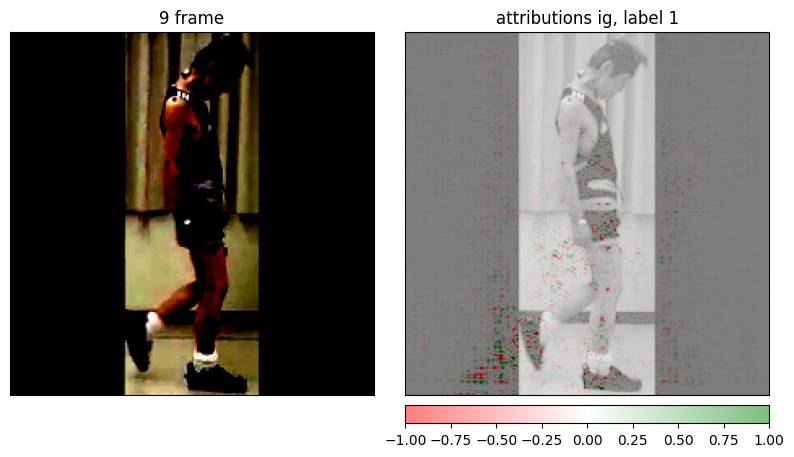

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


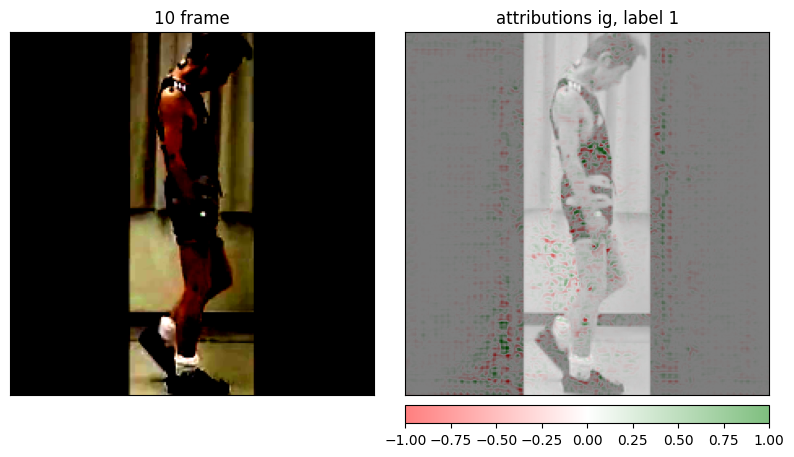

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


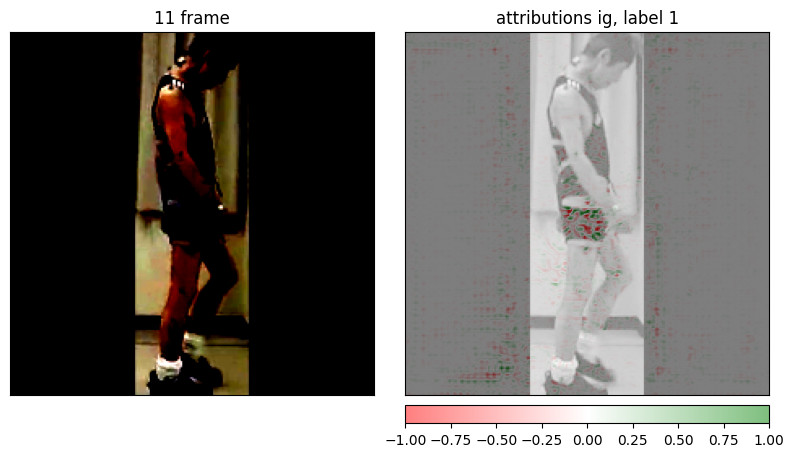

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


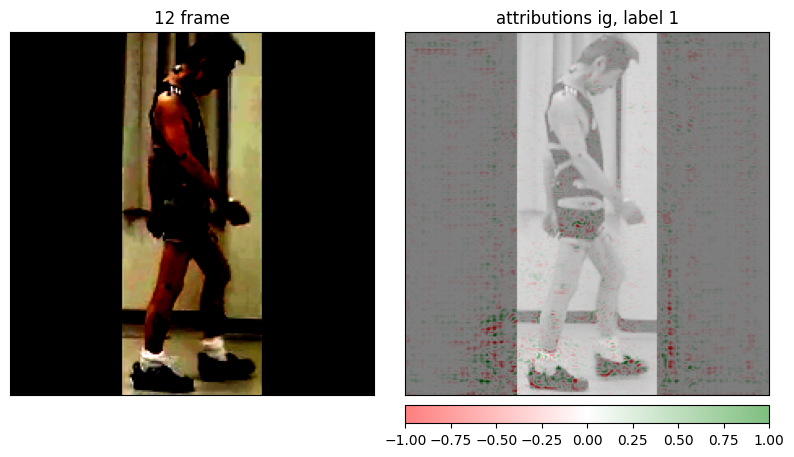

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


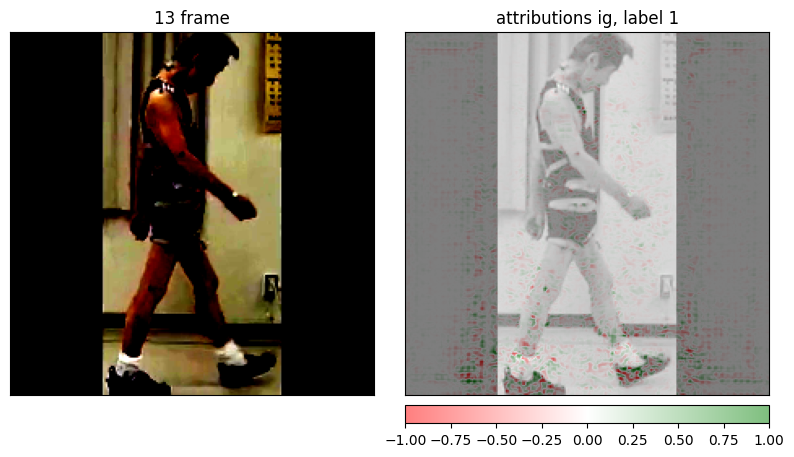

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


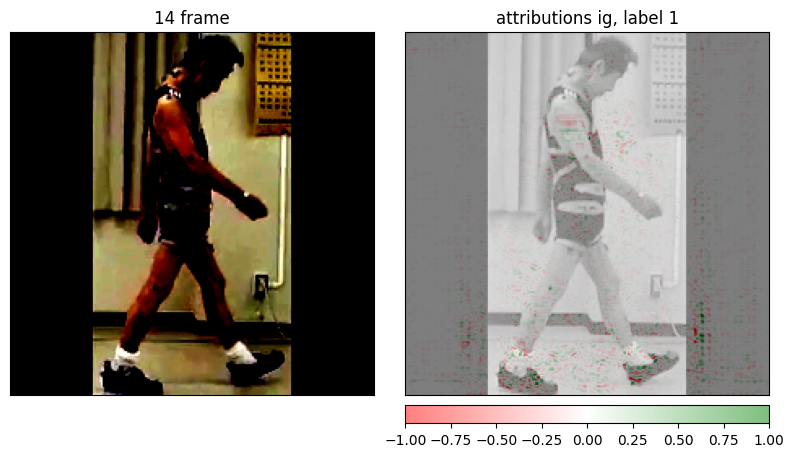

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


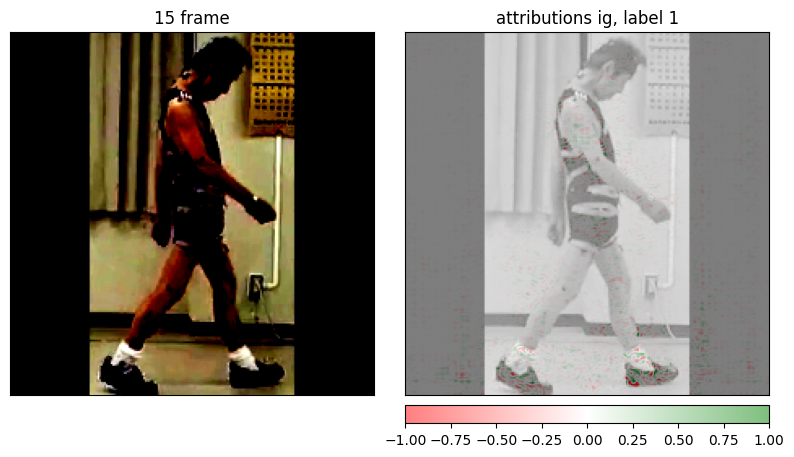

In [15]:
# define the gradient model
ig = IntegratedGradients(model.cuda())

input = video[0].unsqueeze(dim=0).cuda()

attributions_ig, delta = ig.attribute(input, target=0, return_convergence_delta=True, internal_batch_size=1)
attributions_ig.shape, delta

# show a series attr with raw img
series_attr_show(attributions_ig, input, flag=label[0])

In [16]:
# # default_cmap = LinearSegmentedColormap.from_list('custom blue', 
# #                                                  [(0, '#ffffff'),
# #                                                   (0.25, '#000000'),
# #                                                   (1, '#000000')], N=256)

# _ = viz.visualize_image_attr(attributions_ig_asd_not, 
#                              raw_img,
#                              method='blended_heat_map',
#                             #  cmap=default_cmap,
#                              show_colorbar=True,
#                              sign='all',
#                              outlier_perc=1, 
#                              title='attributions ig asd not ')

In [17]:
# guided grad cam method
target_layer = model.model.blocks[-2].res_blocks[0].branch1_conv

In [18]:
target_layer

Conv3d(1024, 2048, kernel_size=(1, 1, 1), stride=(1, 2, 2), bias=False)

/usr/local/lib/python3.9/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/captum/attr/_core/guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(
WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.9/dist-packages/captum/attr/_utils/visualization.py:44: UserWarning: Attempting to normalize by value approximately 0, visualized resultsmay be misleading. This likely means that attribution values are allclose to 0.
  warnings.warn(


IG Attributions: torch.Size([1, 3, 16, 224, 224])


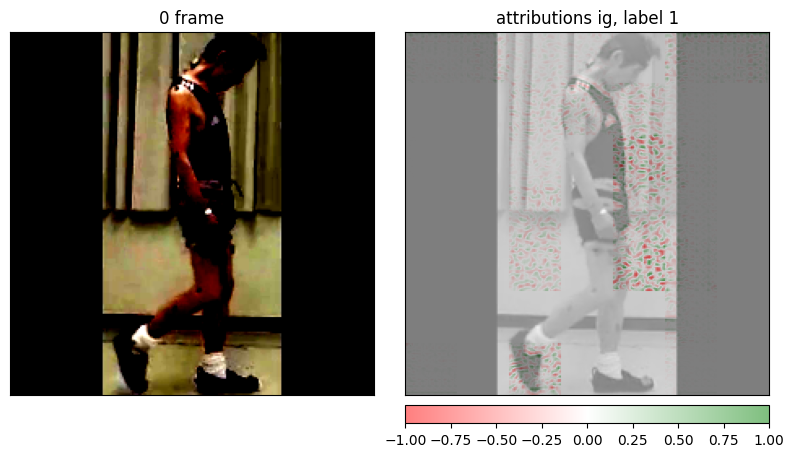

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


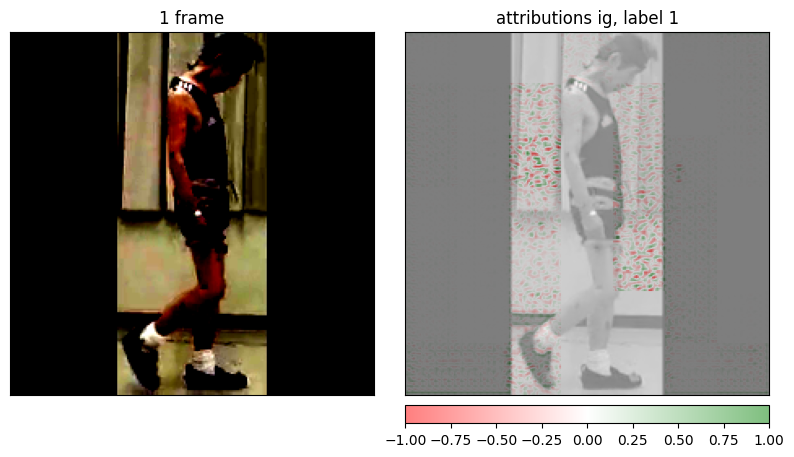

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


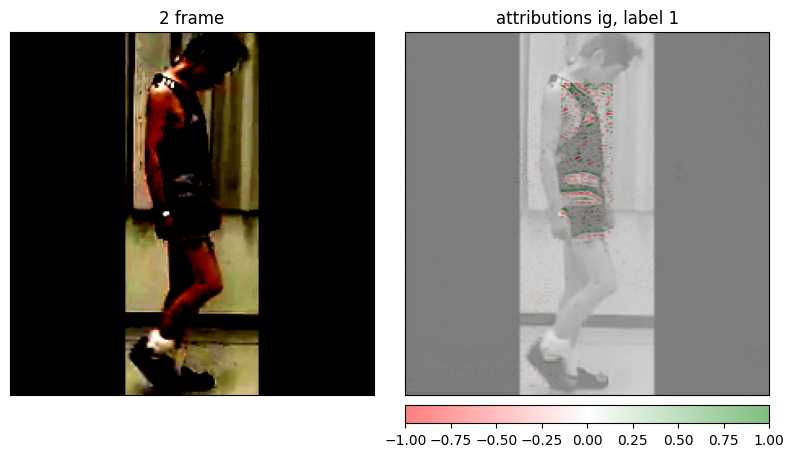

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


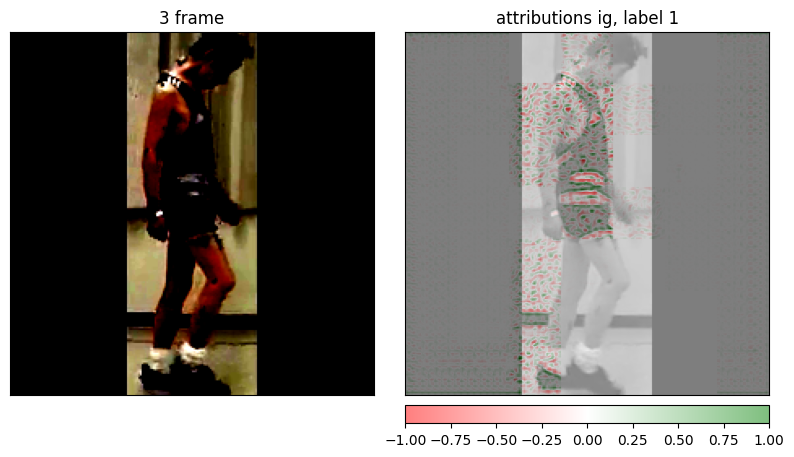

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


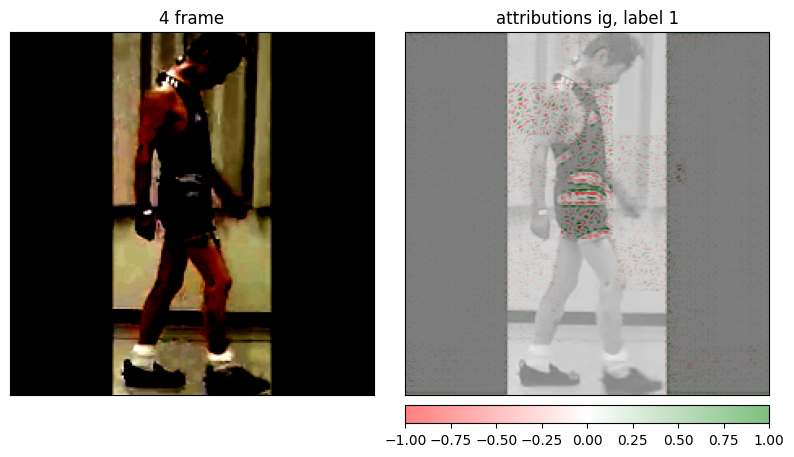

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


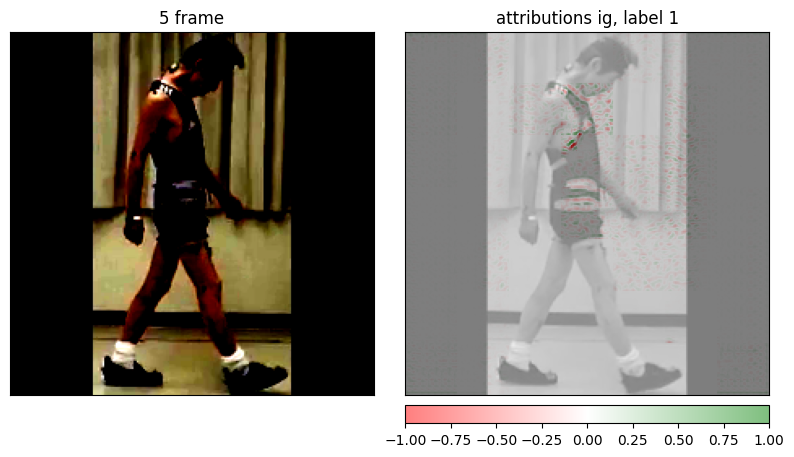

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


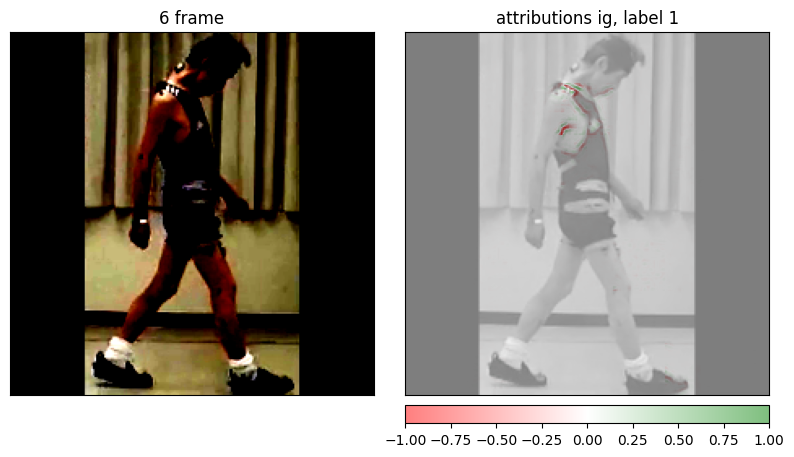

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


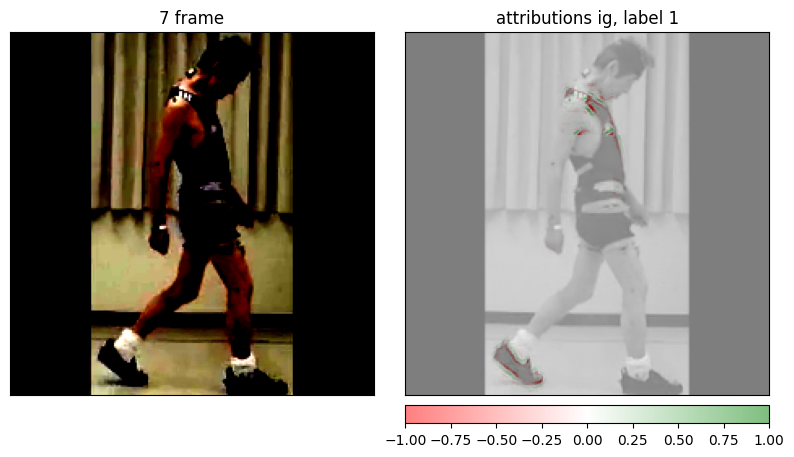

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


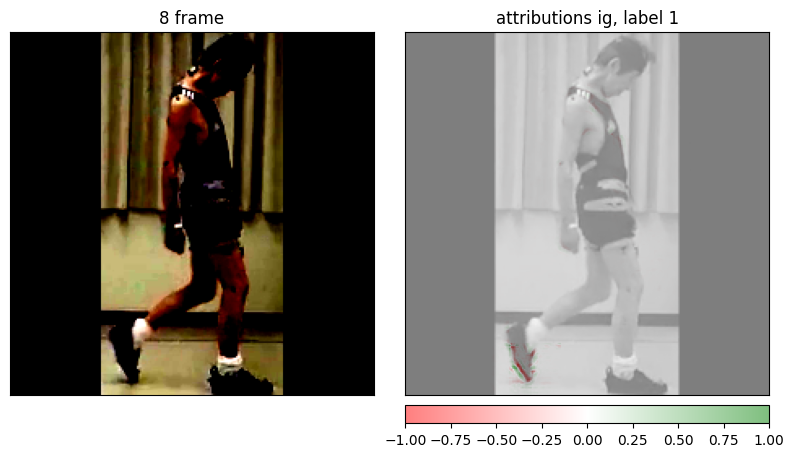

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


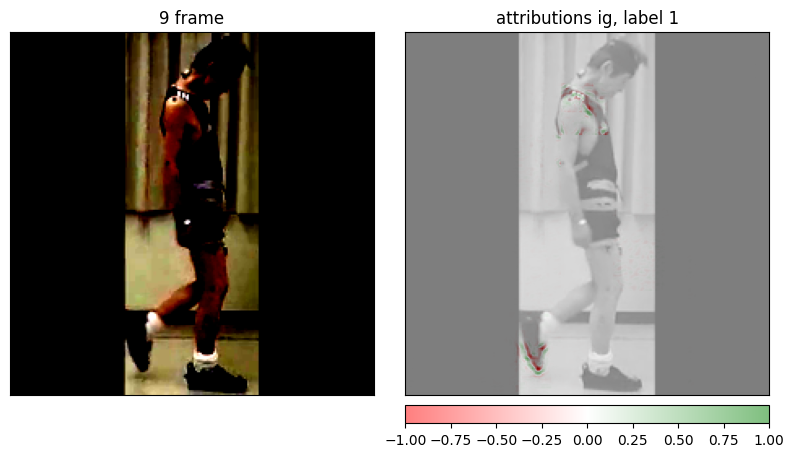

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


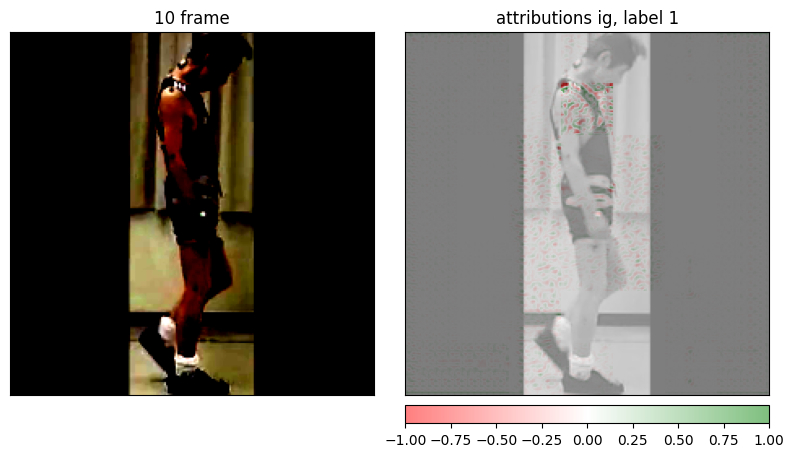

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


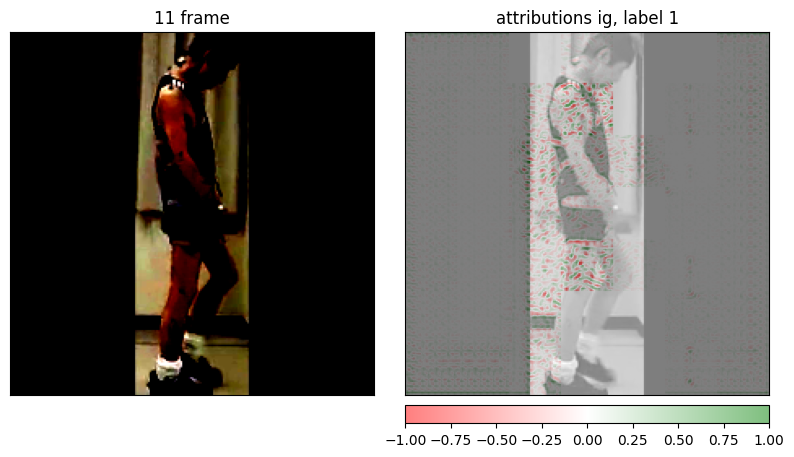

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


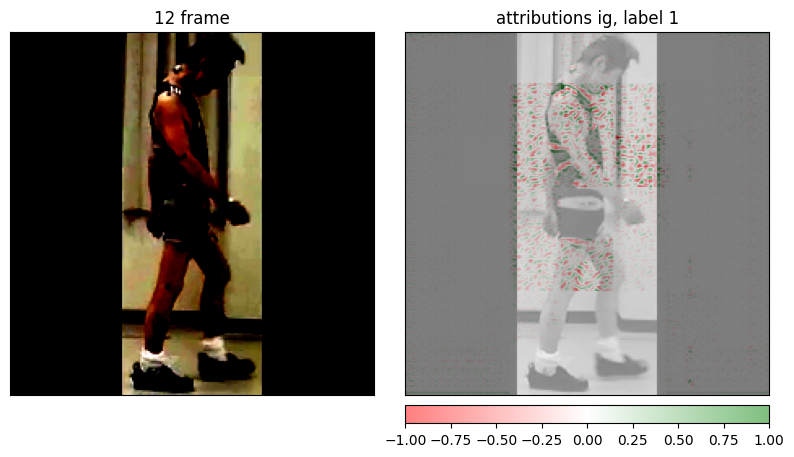

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


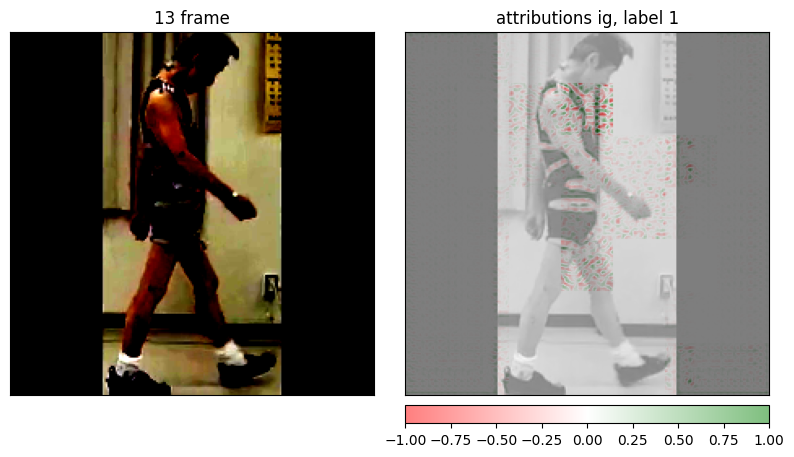

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


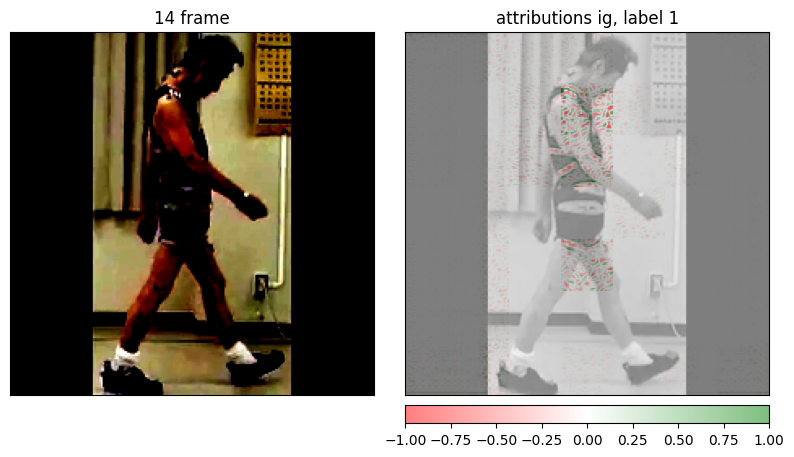

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


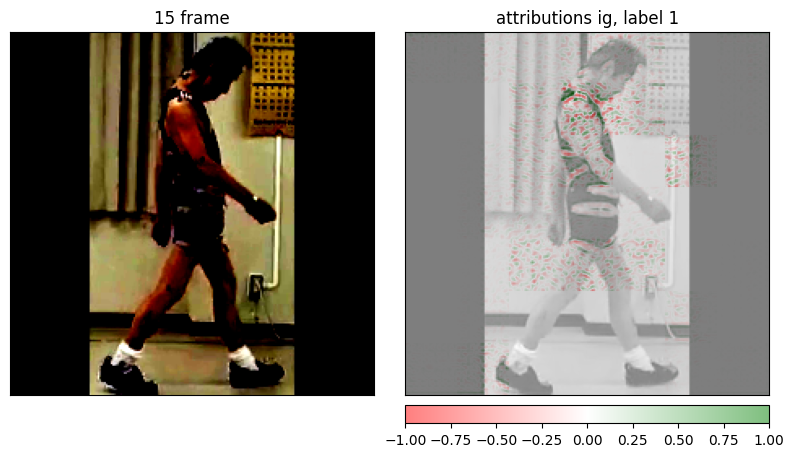

In [19]:
guided_gc = GuidedGradCam(model.cuda(), target_layer)

input = video[0].unsqueeze(0).cuda()

attributions = guided_gc.attribute(input, target=0)

print('IG Attributions:', attributions.shape)

series_attr_show(attributions, input, flag=label[0])

In [20]:
# deconvolution 
from captum.attr import Deconvolution

deconv = Deconvolution(model.cuda())

input = video[0].unsqueeze(0).cuda()

attributions = deconv.attribute(input, target=0)

In [21]:
raw_img = video[0].squeeze().cpu().detach().numpy()
raw_img.shape

attributions_ig = attributions.squeeze().cpu().detach().numpy()
attributions_ig.shape

attributions_ig = attributions_ig.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
raw_img = raw_img.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
attributions_ig.shape, raw_img.shape

((224, 224, 3), (224, 224, 3))

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


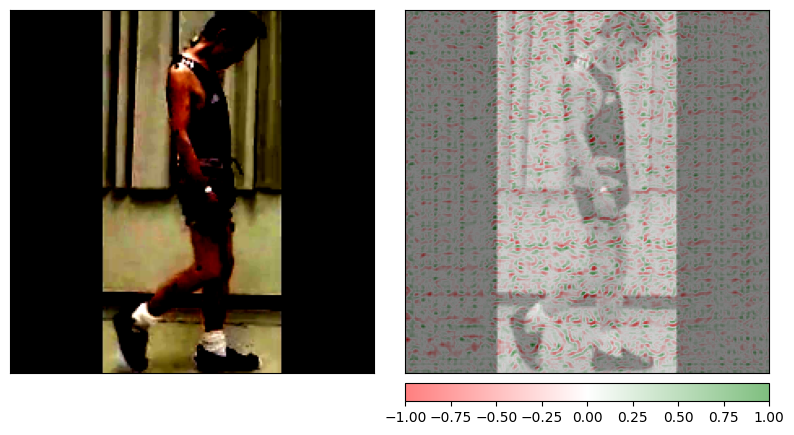

In [22]:
figure, axis = viz.visualize_image_attr_multiple(attributions_ig, 
                             raw_img,
                             methods=['original_image', 'blended_heat_map'],
                             signs=['all', 'all'],
                             show_colorbar=True,
                             outlier_perc=1)

In [23]:
# deep lift 
from captum.attr import DeepLift

dl = DeepLift(model.cuda())

input = video[0].unsqueeze(0).cuda()

attribution = dl.attribute(input, target=0)

/usr/local/lib/python3.9/dist-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [24]:
raw_img = video[0].squeeze().cpu().detach().numpy()
raw_img.shape

attributions_ig = attributions.squeeze().cpu().detach().numpy()
attributions_ig.shape

attributions_ig = attributions_ig.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
raw_img = raw_img.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
attributions_ig.shape, raw_img.shape

((224, 224, 3), (224, 224, 3))

WARN:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


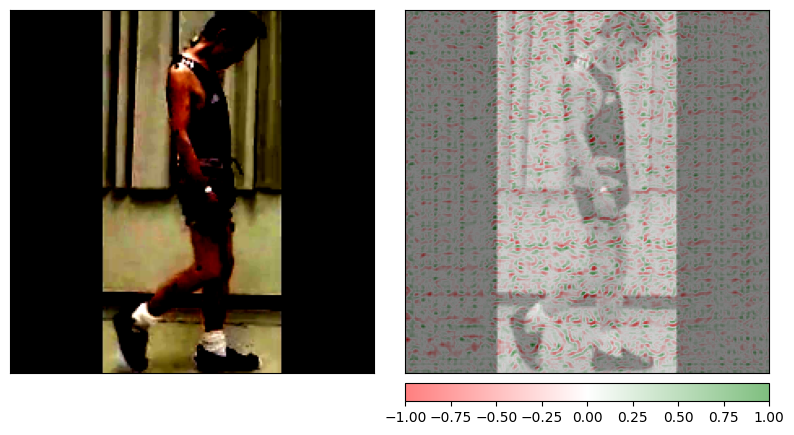

In [25]:
figure, axis = viz.visualize_image_attr_multiple(attributions_ig, 
                             raw_img,
                             methods=['original_image', 'blended_heat_map'],
                             signs=['all', 'all'],
                             show_colorbar=True,
                             outlier_perc=1)

In [26]:
# noise tunnel 
ig = IntegratedGradients(model.cuda())
noise_tunnel = NoiseTunnel(ig)

input = video[0].unsqueeze(0).cuda()

attributions_ig_nt = noise_tunnel.attribute(input, nt_samples=1, nt_type='smoothgrad_sq', target=0, nt_samples_batch_size=1)

RuntimeError: CUDA out of memory. Tried to allocate 2.39 GiB (GPU 1; 23.69 GiB total capacity; 19.17 GiB already allocated; 2.19 GiB free; 19.74 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
raw_img = video[0].squeeze().cpu().detach().numpy()
raw_img.shape

attributions_ig_nt = attributions_ig_nt.squeeze().cpu().detach().numpy()
attributions_ig_nt.shape

attributions_ig_nt = attributions_ig_nt.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
raw_img = raw_img.transpose(1, 0, 2, 3)[0].transpose(1, 2, 0)
attributions_ig_nt.shape, raw_img.shape

In [ ]:
figure, axis = viz.visualize_image_attr_multiple(attributions_ig_nt, 
                             raw_img,
                             methods=['original_image', 'blended_heat_map'],
                             signs=['all', 'all'],
                             show_colorbar=True,
                             outlier_perc=1)

In [ ]:
# occlusion based attribution
from captum.attr import Occlusion

occlusion = Occlusion(model.cuda())

input = video[0].unsqueeze(0).cuda()

attributions_occ = occlusion.attribute(input,
                                       strides=(3, 3, 8, 8),
                                       target=0, sliding_window_shapes=(3, 3, 15, 15), baselines=0)

series_attr_show(attributions_occ, video[0], flag=label[0])